# DS PROJECT - Predicting the outcome of driving exams in Estonia

### Reading data and importing libraries 

In [23]:
import pandas as pd

data = pd.read_csv("cleanedData.csv")

data.head()

,SEISUND,KESTUS,VARASEMAID_KATSEID,BYROO_Haapsalu,BYROO_Jõgeva,BYROO_Jõhvi,BYROO_Kuressaare,BYROO_Kärdla,BYROO_Narva,BYROO_Paide,...,KUU_3,KUU_4,KUU_5,KUU_6,KUU_7,KUU_8,KUU_9,KUU_10,KUU_11,KUU_12
0,1,50.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,24.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,24.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,48.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,51.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Train-test split

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(["SEISUND"], axis=1)
y = data["SEISUND"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



## Trying different models 

### DecisionTree

In [37]:
#Hold-out validation
from sklearn.tree import DecisionTreeClassifier

models_df = pd.DataFrame(columns=['model','params','accuracy','test_accuracy'])

criterions=['gini','entropy']
max_depths=[None,1,2,3,4,5,6,7,8,9,10]
random_state = 0

for crit in criterions:
    for max_depth in max_depths:
        model = DecisionTreeClassifier(criterion = crit, max_depth = max_depth, random_state = random_state)
        model.fit(X_train_sub, y_train_sub)
        acc = accuracy_score(y_val, model.predict(X_val))
        params = model.get_params()
        #test
        acc_test = accuracy_score(y_test,model.predict(X_test))
        models_df.loc[len(models_df)] = pd.Series(["DecisionTree",params,acc,acc_test], index=['model', 'params', 'accuracy','test_accuracy'])

In [38]:
models_df.sort_values(by=['accuracy','test_accuracy'], ascending=False)

,model,params,accuracy,test_accuracy
19,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.894073,0.892806
20,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.893924,0.894122
10,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.893525,0.893922
21,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.893076,0.893444
8,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.892677,0.892846
18,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.892627,0.892527
9,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.892578,0.892766
7,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.892179,0.892128
6,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.891481,0.89133
5,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.889836,0.890094


In [39]:
models_df.loc[10]['params'],#best decisiontree with hold-out validation

({'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 10,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': 0,
  'splitter': 'best'},)

In [6]:
#K-fold cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

results_df = pd.DataFrame(columns=['model', 'params', 'accuracy'])

for crit in criterions:
    for max_depth in max_depths:
        model = DecisionTreeClassifier(criterion = crit, max_depth = max_depth)
        scores = cross_val_score(model, X_train, y_train, cv=5)
        params = model.get_params()
        results_df.loc[len(results_df)] = pd.Series(["DecisionTree",params,np.mean(scores)], index=['model', 'params', 'accuracy'])

In [7]:
results_df.sort_values('accuracy', ascending=False)

,model,params,accuracy
10,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.896073
9,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895714
21,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895365
20,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895235
8,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895215
19,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.894986
7,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.894906
18,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.894238
6,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.892783
5,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.891447


In [8]:
results_df.loc[10].params #K-fold best

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [10]:
#Grid-search
from sklearn.model_selection import GridSearchCV
parameters = {"criterion": criterions,
              "max_depth": max_depths}

model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [11]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [12]:
acc = accuracy_score(y_test, clf.predict(X_test))
acc

0.8953581113415218

### Random Forest Classifier 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Hold-out validation
models_df_rf = pd.DataFrame(columns=['model', 'params', 'accuracy', 'test_accuracy'])

for crit in criterions:
    for max_depth in max_depths:
        model_rf = RandomForestClassifier(criterion=crit, max_depth=max_depth, random_state=random_state)
        model_rf.fit(X_train_sub, y_train_sub)
        acc_rf = accuracy_score(y_val, model_rf.predict(X_val))
        params_rf = model_rf.get_params()
       # Test
        acc_test_rf = accuracy_score(y_test, model_rf.predict(X_test))
        models_df_rf.loc[len(models_df_rf)] = pd.Series(["RandomForest", params_rf, acc_rf, acc_test_rf], index=['model', 'params', 'accuracy', 'test_accuracy'])

In [15]:
models_df_rf.sort_values('accuracy', ascending=False)

,model,params,accuracy,test_accuracy
11,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.893973,0.890892
0,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.892229,0.891171
10,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.883705,0.88479
21,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.883406,0.88475
20,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.883107,0.883634
9,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.882708,0.883753
19,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.880066,0.880683
8,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.878969,0.879247
18,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.878869,0.878609
7,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.877773,0.878808


In [21]:
results_df_rf.loc[11]['params'] # best Hold-out rf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
# K-fold cross-validation
results_df_rf = pd.DataFrame(columns=['model', 'params', 'accuracy'])

for crit in criterions:
    for max_depth in max_depths:
        model_rf = RandomForestClassifier(criterion=crit, max_depth=max_depth)
        scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5)
        params_rf = model_rf.get_params()
        results_df_rf.loc[len(results_df_rf)] = pd.Series(["RandomForest", params_rf, np.mean(scores_rf)], index=['model', 'params', 'accuracy'])

In [17]:
results_df_rf.sort_values('accuracy', ascending=False)

,model,params,accuracy
0,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.893162
11,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.893032
10,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.88719
9,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.886841
8,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.885893
20,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.885874
21,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.885854
7,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.884657
19,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.884448
18,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.884169


In [20]:
results_df_rf.loc[10]['params'] # best K-fold cross-validation rf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
# Grid-search
parameters_rf = {"criterion": criterions, "max_depth": max_depths}

model_rf = RandomForestClassifier()
clf_rf = GridSearchCV(model_rf, parameters_rf)
clf_rf.fit(X_train, y_train)

# Get best parameters
best_params_rf = clf_rf.best_params_

# Evaluate on test set
acc_rf = accuracy_score(y_test, clf_rf.predict(X_test))

print("Random Forest - Best Parameters:", best_params_rf)
print("Random Forest - Accuracy on Test Set:", acc_rf)

Random Forest - Best Parameters: {'criterion': 'entropy', 'max_depth': None}
Random Forest - Accuracy on Test Set: 0.8910113255702664


## SVM

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Hold-out validation
models_df_svm = pd.DataFrame(columns=['model', 'params', 'accuracy', 'test_accuracy'])

# Try different kernel options (linear, polynomial, radial basis function)
kernels = ['linear', 'poly', 'rbf']
random_state = 0

for kernel in kernels:
    model_svm = SVC(kernel=kernel, random_state=random_state)
    model_svm.fit(X_train_sub, y_train_sub)
    
    acc_svm = accuracy_score(y_val, model_svm.predict(X_val))
    params_svm = model_svm.get_params()
    
    # Test
    acc_test_svm = accuracy_score(y_test, model_svm.predict(X_test))
    
    models_df_svm.loc[len(models_df_svm)] = pd.Series(["SVM", params_svm, acc_svm, acc_test_svm], index=['model', 'params', 'accuracy', 'test_accuracy'])


In [29]:
models_df_svm.sort_values('accuracy', ascending=False)

,model,params,accuracy,test_accuracy
0,SVM,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.892528,0.89141
1,SVM,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.890185,0.890094
2,SVM,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.886347,0.8881


In [30]:
# K-fold cross-validation
results_df_svm = pd.DataFrame(columns=['model', 'params', 'accuracy'])

for kernel in kernels:
    model_svm = SVC(kernel=kernel)
    scores_svm = cross_val_score(model_svm, X_train, y_train, cv=5)
    params_svm = model_svm.get_params()
    results_df_svm.loc[len(results_df_svm)] = pd.Series(["SVM", params_svm, np.mean(scores_svm)], index=['model', 'params', 'accuracy'])

In [31]:
results_df_svm.sort_values('accuracy', ascending=False)

,model,params,accuracy
0,SVM,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.893142
1,SVM,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.892105
2,SVM,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.889463


## Best parameters and model

In [71]:
best_params = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10,
               'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0,
               'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0,
               'random_state': 0, 'splitter': 'best'}

model_dt = DecisionTreeClassifier(**best_params)
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.8953979901100654


In [72]:
# feature importance 
feature_importance = model_dt.feature_importances_

# Create pairs of feature names and their importance scores
feature_importance_pairs = list(zip(X.columns, feature_importance))

# Sort based on importance scores (descending order)
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

KESTUS: 0.9199351965791741
KATEGOORIA_B: 0.011881206707121207
AASTA_2021: 0.006368536235180191
EKSAMINEERIJA_a1d9e404aeec83d1: 0.004612700106984837
VARASEMAID_KATSEID: 0.0037206419747496003
KATEGOORIA_C: 0.0033071247996649855
EKSAMINEERIJA_ae264be409f2ca9f: 0.003265350152390079
KATEGOORIA_CE: 0.0032101970401420513
EKSAMINEERIJA_b7576201d47b425b: 0.002944566577317093
KATEGOORIA_A: 0.0026802362529509353
EKSAMINEERIJA_b6982cbd7a6000e4: 0.002628096501841924
EKSAMINEERIJA_ff4d9b9b519322e3: 0.002604529947145588
EKSAMINEERIJA_eb13365f3504e035: 0.0025125510062250778
ERITINGIMUSED_96: 0.0023940649334062555
EKSAMINEERIJA_844452b4e4bac2ef: 0.0021183614606557874
EKSAMINEERIJA_4ee4a4702131dac3: 0.0019782305882437108
EKSAMINEERIJA_a90a6cc35a006268: 0.001245969705619591
KATEGOORIA_A2: 0.0010573472782606681
EKSAMINEERIJA_4b9e369e12d8f969: 0.0008848155215942512
EKSAMINEERIJA_400e86ed874ccd07: 0.0008593704634598006
EKSAMINEERIJA_d15d81b55baf64ed: 0.0008317081578692585
BYROO_Kuressaare: 0.000828254222383

## Plotting tree 

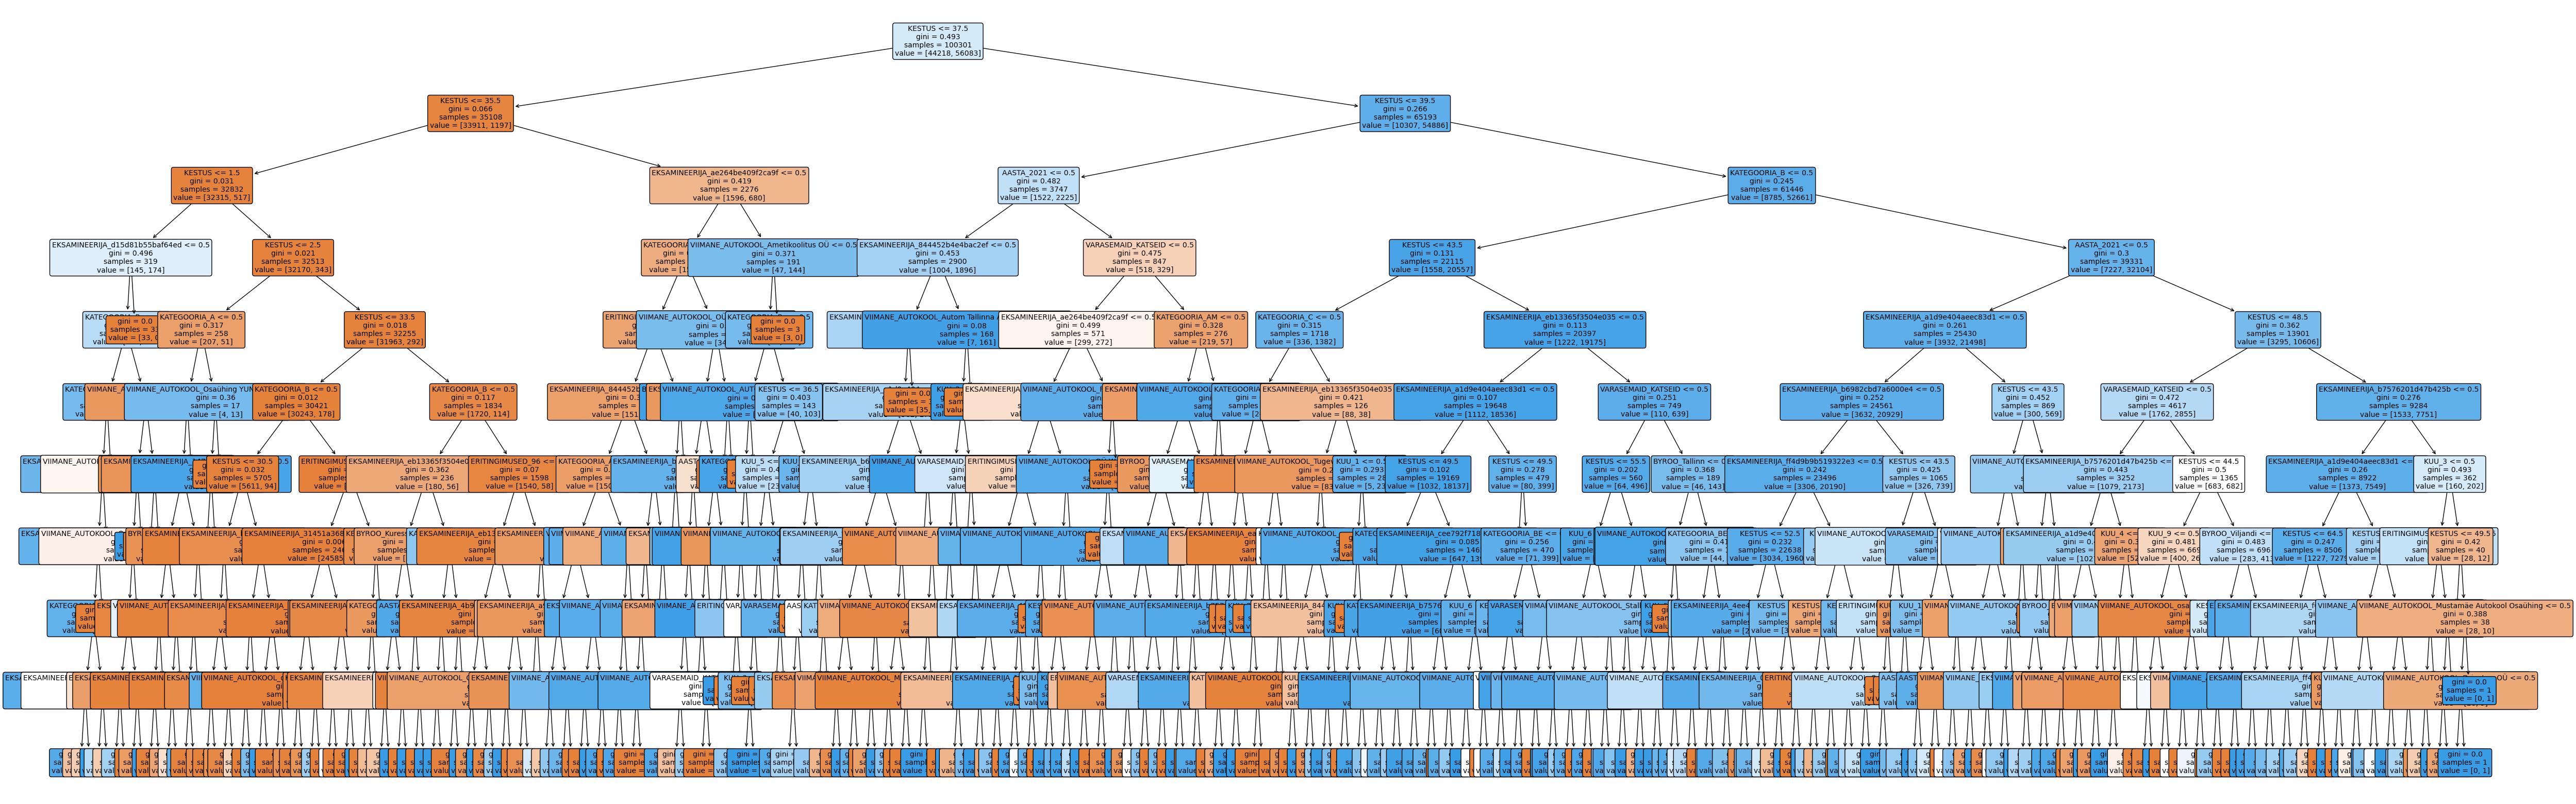

In [73]:
plt.figure(figsize=(60, 20))
plot_tree(model_dt, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.show()